In [1]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance


from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score
from   sklearn.linear_model import LogisticRegression
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   imblearn.over_sampling import RandomOverSampler
import pickle

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [19]:
# Read data in form of a csv file
df1 = pd.read_csv('./artist.csv')
df2 = pd.read_csv('./track.csv')

# First 5 rows of the dataset
df1.head()


,dates,ids,names,monthly_listeners,popularity,followers,genres,first_release,last_release,num_releases,num_tracks,playlists_found,feat_track_ids
0,2024-04-01,01XYiBYaoMJcNhPokrg0l0,stayc,3049521.0,63,1782552,"k-pop, k-pop girl group",2020,2024,14,2,K-Pop ON! (온),0y0uzuB1HxljAY2j0tLETp
1,2024-04-01,099toTcKJoywTosZr2hHjy,langhorne slim,1060777.0,51,163686,"anti-folk, indie folk, modern folk rock, new a...",2008,2023,20,3,Sunrise Run,40rjypnguxfhPy4Bbv5SWc
2,2024-04-01,09HhJFJqYmvCCwQwj47Ci4,hontoni,119199.0,35,60,NaN,2021,2024,14,1,Meditate to the Sounds of Nature,7CIj6Jk5vKNEgxGNRoAWbC
3,2024-04-01,09rAM5GlzBVG3FODKTlrRu,d'verti,46999.0,29,42,NaN,2022,2024,3,1,Meditate to the Sounds of Nature,"6O9l7A57SQ4Z5VwSKyu0UH, 1y5VTWasp7vgqUxjaKUK0B"
4,2024-04-01,0BvkDsjIUla7X0k6CSWh1I,luke bryan,10460890.0,76,8487512,"contemporary country, country, country road, m...",2007,2023,20,6,Sunrise Run,386DfI5sZ0eJi1i6SZVqLw


In [22]:
df1 = df1[['ids', 'popularity']]
df1.head()
df1.shape

(27782, 2)

In [24]:
df1= df1.drop_duplicates()
print(df1)
df1.shape

                          ids  popularity
0      01XYiBYaoMJcNhPokrg0l0          63
1      099toTcKJoywTosZr2hHjy          51
2      09HhJFJqYmvCCwQwj47Ci4          35
3      09rAM5GlzBVG3FODKTlrRu          29
4      0BvkDsjIUla7X0k6CSWh1I          76
...                       ...         ...
27775  2M0RKn1NTwiZsfqXuSaKpQ          28
27776  5IaDEj02UeuU9YQSunGWgG          41
27778  5DIqscCDlSKeas54ucF9SI          29
27779  6AVe04cz8yEaSIVUbm2o02          33
27780  5w05coq5piPottWOoVVaWE          40

[17181 rows x 2 columns]


(17181, 2)

In [9]:
df2.head()

,ids,names,popularity,markets,artists,release_date,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,musicalkey,musicalmode,time_signature,count,dates,playlists_found
0,7lznzPjPyRFdcYaD9gN7a3,This Is Shangrila,45.0,152.0,3XR64HmFo4OvexUUNW7TP0,1990-01-01,220706.0,0.004280,0.467,0.774,0.001340,0.1580,-10.617,0.0515,109.529,0.324,4.0,0.0,4.0,1.0,2024-04-01,Grunge Forever
1,3e2fDgC93LGc9Lbdvr6I9k,River Of Deceit,52.0,185.0,0T7JQxpy1Li93vLNirbv0Z,1995-03-07,302693.0,0.111000,0.461,0.246,0.000374,0.0963,-13.487,0.0298,88.446,0.178,0.0,1.0,4.0,1.0,2024-04-01,Grunge Forever
2,0donjzZGsCA2PfPUA4EdMN,Shadow of the Season,46.0,185.0,3Ukr3Ufjg8ygRJv7Ww887f,1992,273813.0,0.000046,0.163,0.937,0.002970,0.3720,-5.502,0.0882,184.482,0.413,0.0,1.0,4.0,1.0,2024-04-01,Grunge Forever
3,3bE5slaVEfaDreqARl6k4M,Yellow Ledbetter,69.0,183.0,1w5Kfo2jwwIPruYS2UWh56,1991,303586.0,0.290000,0.504,0.354,0.000005,0.1570,-11.300,0.0339,140.870,0.292,4.0,1.0,4.0,1.0,2024-04-01,Grunge Forever
4,1LvJ1PFobtIm5DwzRrK0jG,Swallow My Pride,43.0,185.0,1XIIxzmo6BNRR4QkImSdsX,1990-09-13,179800.0,0.423000,0.349,0.869,0.000000,0.7600,-11.481,0.0934,127.440,0.193,4.0,1.0,4.0,1.0,2024-04-01,Grunge Forever


In [40]:
df2_expanded = df2.copy()
df2_expanded['artists'] = df2_expanded['artists'].str.split(',')
df2_expanded = df2_expanded.explode('artists').reset_index(drop=True)
df2_expanded=df2_expanded.drop(['ids'],axis=1)
df2_expanded.drop(columns=['popularity', 'names','release_date','dates','playlists_found'],inplace=True)

df2_expanded.head(100)

,markets,artists,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,musicalkey,musicalmode,time_signature,count
0,152.0,3XR64HmFo4OvexUUNW7TP0,220706.0,0.004280,0.467,0.7740,0.001340,0.1580,-10.617,0.0515,109.529,0.3240,4.0,0.0,4.0,1.0
1,185.0,0T7JQxpy1Li93vLNirbv0Z,302693.0,0.111000,0.461,0.2460,0.000374,0.0963,-13.487,0.0298,88.446,0.1780,0.0,1.0,4.0,1.0
2,185.0,3Ukr3Ufjg8ygRJv7Ww887f,273813.0,0.000046,0.163,0.9370,0.002970,0.3720,-5.502,0.0882,184.482,0.4130,0.0,1.0,4.0,1.0
3,183.0,1w5Kfo2jwwIPruYS2UWh56,303586.0,0.290000,0.504,0.3540,0.000005,0.1570,-11.300,0.0339,140.870,0.2920,4.0,1.0,4.0,1.0
4,185.0,1XIIxzmo6BNRR4QkImSdsX,179800.0,0.423000,0.349,0.8690,0.000000,0.7600,-11.481,0.0934,127.440,0.1930,4.0,1.0,4.0,1.0
5,185.0,7LuYiSXiWs86rwWJjEEgB9,152706.0,0.000048,0.354,0.9410,0.660000,0.3310,-6.984,0.0737,131.442,0.5690,1.0,1.0,4.0,1.0
6,184.0,2UazAtjfzqBF0Nho2awK4z,313946.0,0.006710,0.426,0.9400,0.000002,0.1400,-5.279,0.0424,144.472,0.4660,7.0,0.0,4.0,1.0
7,184.0,5xUf6j4upBrXZPg6AI4MRK,318586.0,0.000217,0.350,0.8280,0.000161,0.0774,-5.373,0.0410,105.435,0.1470,6.0,1.0,4.0,1.0
8,185.0,5HUFo8AH9ZILmlyKFfEMNP,203000.0,0.225000,0.632,0.7420,0.001150,0.1380,-6.785,0.0342,119.509,0.7250,10.0,1.0,4.0,1.0
9,185.0,1w5Kfo2jwwIPruYS2UWh56,340907.0,0.007520,0.284,0.8750,0.000461,0.4020,-6.069,0.0422,75.009,0.5950,11.0,0.0,4.0,1.0


In [41]:
merged_df = pd.merge(df2_expanded, df1, left_on='artists', right_on='ids', how='left')
merged_df.head(100)

,markets,artists,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,musicalkey,musicalmode,time_signature,count,ids,popularity
0,152.0,3XR64HmFo4OvexUUNW7TP0,220706.0,0.004280,0.467,0.7740,0.001340,0.1580,-10.617,0.0515,109.529,0.3240,4.0,0.0,4.0,1.0,3XR64HmFo4OvexUUNW7TP0,42.0
1,185.0,0T7JQxpy1Li93vLNirbv0Z,302693.0,0.111000,0.461,0.2460,0.000374,0.0963,-13.487,0.0298,88.446,0.1780,0.0,1.0,4.0,1.0,0T7JQxpy1Li93vLNirbv0Z,49.0
2,185.0,3Ukr3Ufjg8ygRJv7Ww887f,273813.0,0.000046,0.163,0.9370,0.002970,0.3720,-5.502,0.0882,184.482,0.4130,0.0,1.0,4.0,1.0,3Ukr3Ufjg8ygRJv7Ww887f,44.0
3,183.0,1w5Kfo2jwwIPruYS2UWh56,303586.0,0.290000,0.504,0.3540,0.000005,0.1570,-11.300,0.0339,140.870,0.2920,4.0,1.0,4.0,1.0,1w5Kfo2jwwIPruYS2UWh56,75.0
4,183.0,1w5Kfo2jwwIPruYS2UWh56,303586.0,0.290000,0.504,0.3540,0.000005,0.1570,-11.300,0.0339,140.870,0.2920,4.0,1.0,4.0,1.0,1w5Kfo2jwwIPruYS2UWh56,74.0
5,183.0,1w5Kfo2jwwIPruYS2UWh56,303586.0,0.290000,0.504,0.3540,0.000005,0.1570,-11.300,0.0339,140.870,0.2920,4.0,1.0,4.0,1.0,1w5Kfo2jwwIPruYS2UWh56,73.0
6,185.0,1XIIxzmo6BNRR4QkImSdsX,179800.0,0.423000,0.349,0.8690,0.000000,0.7600,-11.481,0.0934,127.440,0.1930,4.0,1.0,4.0,1.0,1XIIxzmo6BNRR4QkImSdsX,32.0
7,185.0,7LuYiSXiWs86rwWJjEEgB9,152706.0,0.000048,0.354,0.9410,0.660000,0.3310,-6.984,0.0737,131.442,0.5690,1.0,1.0,4.0,1.0,7LuYiSXiWs86rwWJjEEgB9,43.0
8,184.0,2UazAtjfzqBF0Nho2awK4z,313946.0,0.006710,0.426,0.9400,0.000002,0.1400,-5.279,0.0424,144.472,0.4660,7.0,0.0,4.0,1.0,2UazAtjfzqBF0Nho2awK4z,67.0
9,184.0,5xUf6j4upBrXZPg6AI4MRK,318586.0,0.000217,0.350,0.8280,0.000161,0.0774,-5.373,0.0410,105.435,0.1470,6.0,1.0,4.0,1.0,5xUf6j4upBrXZPg6AI4MRK,68.0


In [42]:
merged_df.shape

(36387, 18)

In [43]:
merged_df.describe()

,markets,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,musicalkey,musicalmode,time_signature,count,popularity
count,36387.000000,3.638700e+04,36347.000000,36347.000000,36347.000000,36347.000000,36347.000000,36347.000000,36347.000000,36347.000000,36347.000000,36347.000000,36347.000000,36347.000000,36387.000000,29218.000000
mean,172.716932,2.018141e+05,0.347690,0.582176,0.572221,0.199235,0.171781,-10.166895,0.089781,119.872081,0.435166,5.220211,0.644015,3.911272,2.939786,55.742556
std,43.221651,6.108032e+04,0.362577,0.187030,0.288507,0.353556,0.129713,8.831027,0.091428,29.720559,0.248413,3.572786,0.478817,0.411243,3.149263,19.541195
min,0.000000,1.466000e+03,0.000001,0.000000,0.000020,0.000000,0.012400,-50.051000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,184.000000,1.636360e+05,0.029500,0.464000,0.407000,0.000000,0.098200,-10.140000,0.037000,96.989000,0.226000,2.000000,0.000000,4.000000,1.000000,42.000000
50%,185.000000,1.929460e+05,0.183000,0.602000,0.638000,0.000099,0.117000,-6.904000,0.049800,121.824000,0.419000,5.000000,1.000000,4.000000,2.000000,56.000000
75%,185.000000,2.279940e+05,0.660000,0.721000,0.803000,0.162000,0.198000,-5.068000,0.095500,139.871000,0.627000,8.000000,1.000000,4.000000,3.000000,71.000000
max,185.000000,1.160720e+06,0.996000,0.978000,0.999000,0.995000,0.975000,1.827000,0.885000,219.984000,0.986000,11.000000,1.000000,5.000000,33.000000,100.000000


In [44]:
# Missing values for every column
merged_df.isna().sum()

markets                0
artists                0
duration_ms            0
acousticness          40
danceability          40
energy                40
instrumentalness      40
liveness              40
loudness              40
speechiness           40
tempo                 40
valence               40
musicalkey            40
musicalmode           40
time_signature        40
count                  0
ids                 7169
popularity          7169
dtype: int64

In [45]:
merged_df=merged_df.dropna()

In [48]:
merged_df.isna().sum()


markets             0
artists             0
duration_ms         0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
musicalkey          0
musicalmode         0
time_signature      0
count               0
ids                 0
popularity          0
dtype: int64

In [49]:
merged_df.shape

(29178, 18)

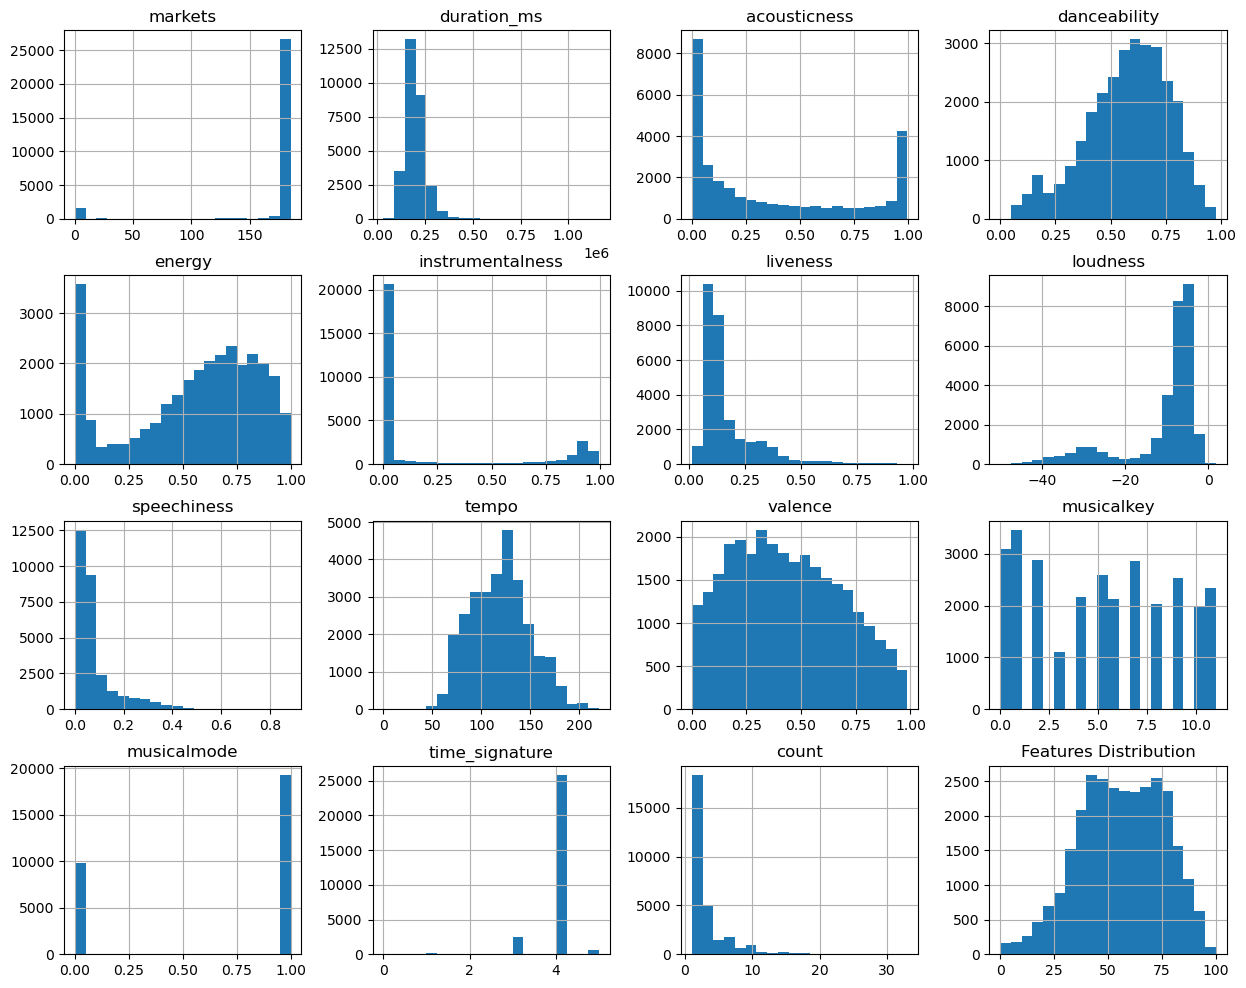

In [52]:
# Check the distribution of all the features
merged_df.hist(figsize=(15,12),bins = 20)
plt.title("Features Distribution")
plt.show()

In [63]:
ignore_columns = ['ids', 'artists']


IndexError: index 17 is out of bounds for axis 0 with size 16

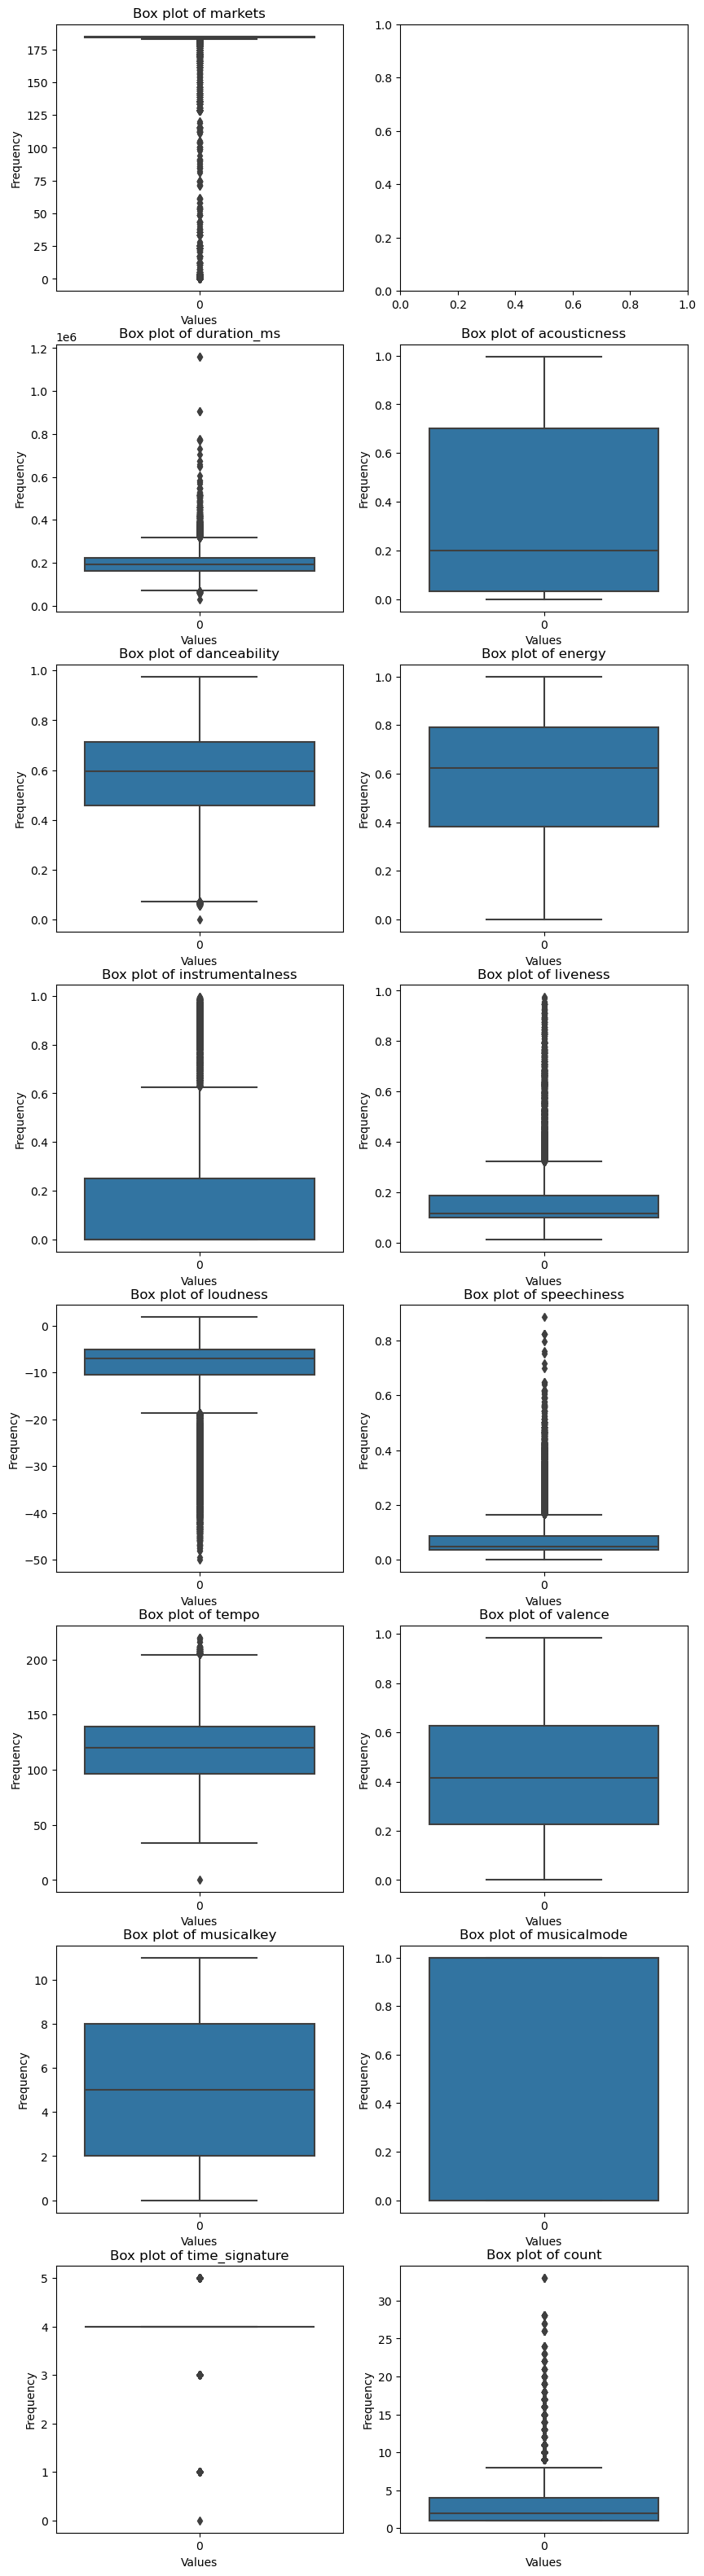

In [83]:
num_cols_to_plot = sum(1 for col in merged_df.columns if col not in ignore_columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols_to_plot + 1) // 2  # Add 1 to ensure at least 1 row
num_cols = 2

# Create subplots for box plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))

# Flatten the axes if necessary
axes = axes.flatten()

# Iterate over each column and create individual box plots
for i, column in enumerate(merged_df.columns):
    if column not in ignore_columns:
        sns.boxplot(data=merged_df[column], ax=axes[i])
        axes[i].set_title(f'Box plot of {column}')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Frequency')

# Hide empty subplots
for i in range(num_cols_to_plot, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()